## 1. Introduction

With growing demands in the market, a Superstore Giant likes to have a strong sense of what factors matter most to maximize its sales of office supplies and home office furnitures. 

The project is using data ['Superstore.csv'](Https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) from Kaggle containing information related to sales, profits, and other facts about a giant Superstore between Jan. 2014 and Jan. 2018.
***

### Objective

In this project, we challenge ourselves: can we forecast the sales using the Superstore’s sales data? 

The aim is to build a data driven predictive model by using historical data of products, regions, categories, and profits. 
More importantly, we want to explore which information is more useful to predict the sales. 

 - To explore, organize and analyze the data,  and make sure it's well defined
 - To identify features that significantly affect the sales
 - To develop different machine learning models that predict the sales based on available features
 - To provide recommendations for the superstore to maximize its sales
 ***
 
### Data
a. Orders
 - Row ID => Unique ID for each row.
 - Order ID => Unique Order ID for each Customer.
 - Order Date => Order Date of the product.
 - Ship Date => Shipping Date of the Product.
 - Ship Mode=> Shipping Mode specified by the Customer.
 - Customer ID => Unique ID to identify each Customer.
 - Customer Name => Name of the Customer.
 - Segment => The segment where the Customer belongs.
 - Country => Country of residence of the Customer.
 - City => City of residence of of the Customer.
 - State => State of residence of the Customer.
 - Postal Code => Postal Code of every Customer.
 - Region => Region where the Customer belong.

b. Products
 - Product ID => Unique ID of the Product.
 - Category => Category of the product ordered.
 - Sub-Category => Sub-Category of the product ordered.
 - Product Name => Name of the Product
 - Sales => Sales of the Product.
 - Quantity => Quantity of the Product.
 - Discount => Discount provided.
 - Profit => Profit/Loss incurred.

## 2. Sourcing and Loading the Data

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import datetime as dt

from library.sb_utils import save_file
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### 2.2 Load the data

In [2]:
# read data
df = pd.read_csv('Data/Superstore.csv', encoding='ISO-8859-1')
# check the first few rows of data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
print("The dataset contains: {} customers and {} features.".format(df.shape[0], df.shape[1]))

The dataset contains: 9994 customers and 21 features.


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## 3. Data Cleaning 

In [6]:
# Check null/missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

 - Data is very clean and no missing value is observed.

In [7]:
# Ship mode
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [8]:
# Segment
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
# df['City'].value_counts()
df['City'].nunique()

531

In [10]:
# Region
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [11]:
# Category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [13]:
# remove undesired rows/columns
To_Drop = ['Row ID', 'Order ID','Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Sub-Category','Country', 'City', 'Postal Code']
df.drop(columns=To_Drop, axis=1, inplace=True)

 - 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', and 'Product ID' were dropped because I think they don't provide much predictive power.
 - 'Product Name' and 'Sub-Category' were dropped as 'Category' has the same information in more general way.
 - 'Country' was dropped, as all the instances occur in the United States.
 - 'City' was dropped, as there are too many individual cities to be accounted for, and it is similar to the information in 'State' and 'Region'.
 - 'Postal Code' was dropped.

## 4. Feature Engineering

 - **'Order Date' and 'Ship Date' are converted to 'datetime' objects instead of objects.**

In [14]:
# reformat and convert 'object' to 'datetime' 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [15]:
# generate a new column about the time between order and shipping to gain more information on the date
df['Waiting_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [16]:
# drop columns
df_clean = df.drop(columns=['Order Date', 'Ship Date'], axis=1)

In [17]:
# sort
df_clean = df_clean.sort_values(by=['Sales', 'Profit'], ascending=[False, False])

In [18]:
df_clean.head()

,Ship Mode,Segment,State,Region,Category,Sales,Quantity,Discount,Profit,Waiting_Days
2697,Standard Class,Home Office,Florida,South,Technology,22638.480,6,0.5,-1811.0784,5
6826,Standard Class,Corporate,Indiana,Central,Technology,17499.950,5,0.0,8399.9760,7
8153,First Class,Consumer,Washington,West,Technology,13999.960,4,0.0,6719.9808,2
2623,First Class,Home Office,New York,East,Technology,11199.968,4,0.2,3919.9888,2
4190,Standard Class,Consumer,Delaware,East,Technology,10499.970,3,0.0,5039.9856,5


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 2697 to 4101
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   State         9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Category      9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
 9   Waiting_Days  9994 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 858.9+ KB


In [20]:
# statistic summary
df_clean.describe()

,Sales,Quantity,Discount,Profit,Waiting_Days
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,3.958175
std,623.245101,2.225110,0.206452,234.260108,1.747567
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,17.280000,2.000000,0.000000,1.728750,3.000000
50%,54.490000,3.000000,0.200000,8.666500,4.000000
75%,209.940000,5.000000,0.200000,29.364000,5.000000
max,22638.480000,14.000000,0.800000,8399.976000,7.000000


## 5. EDA

#### Univariate analysis
Explore each variable, study characteristics of each variable, and there is no reference to causes or relationships.

Univariate non-graphical: Central tendency, Deviation, Skewness, kurtosis, etc.

Univariate graphical: Histogram, Box Plots, Pie Charts, Density Plot, etc.

### 5.1 Number of distinct regions and states

In [21]:
#Select the 'Region' and 'state' columns from data and use the `nunique` method to calculate
#the number of unique values in each
df[['Region', 'State']].nunique()

Region     4
State     49
dtype: int64

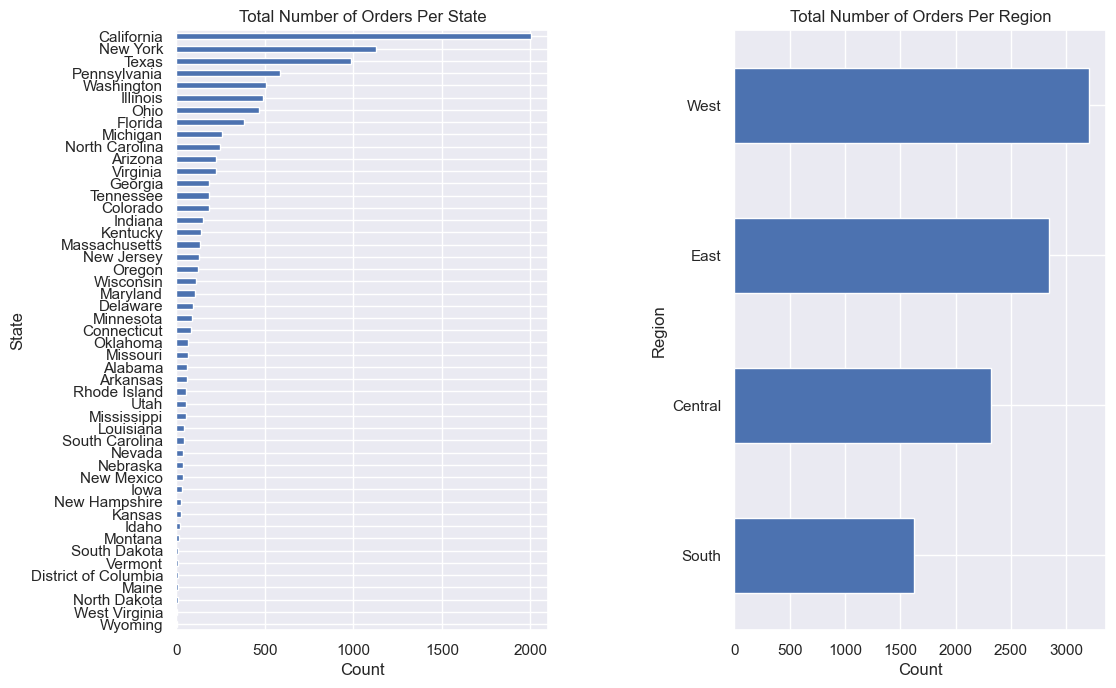

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12,12))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.State.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_ylabel('State')
ax[0].set_xlabel('Count')
ax[0].set_title('Total Number of Orders Per State')

df.Region.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[1])
ax[1].set_ylabel('Region')
ax[1].set_xlabel('Count')
ax[1].set_title('Total Number of Orders Per Region')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.5, hspace=0)
plt.show();

- Looking at the distribution of States, we can see that California (West), New York (East) and Texas (Central) accounting for the majority of orders. The target in this project is Texas which comes in at the 3rd place.

### 5.2 Distribution of average Sales, Profit, Waiting_Days per state

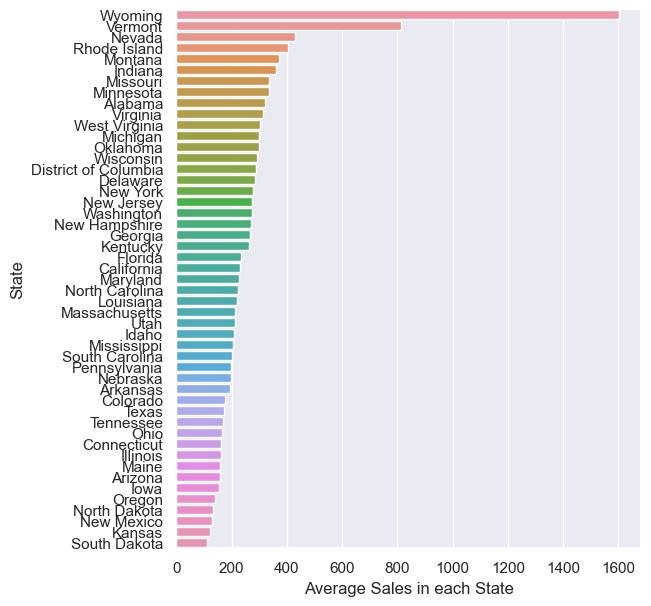

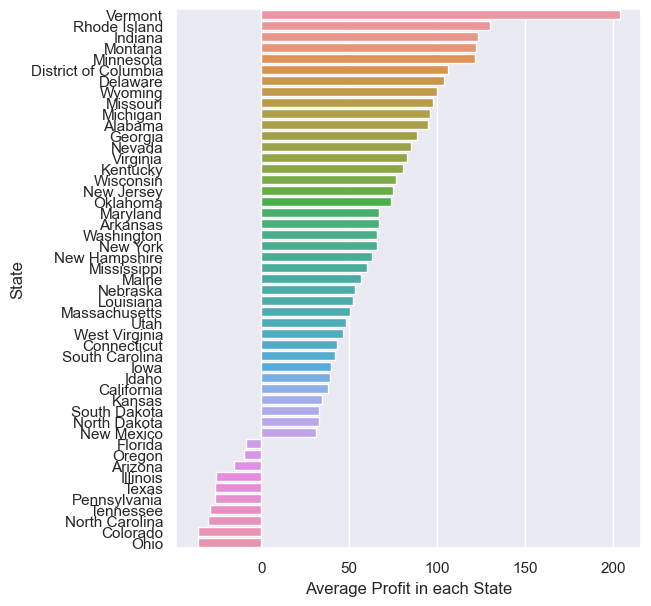

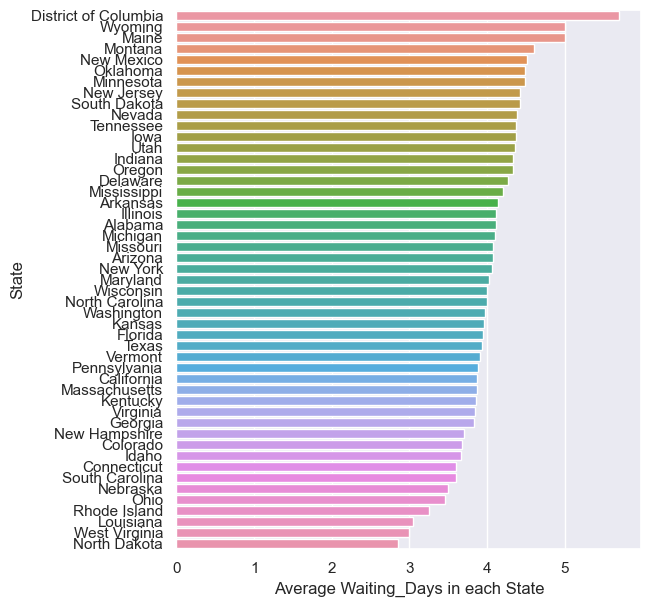

In [23]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit','Waiting_Days']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,7))
    mean_df = df.groupby(by=['State'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(y=mean_df.index, x=mean_df, ax=ax)
    ax.set_xlabel(f'Average {col} in each State') 
    ax.set_ylabel('State')
    plt.show();

In [24]:
# aggregations to have a top-level view
State_sales_profit_mean = df_clean.groupby('State')['Sales', 'Profit'].mean()
State_sales_profit_mean.sort_values('Sales', ascending=False, inplace=True)

State_sales_profit_mean.head()

,Sales,Profit
State,,
Wyoming,1603.136000,100.196000
Vermont,811.760909,204.088936
Nevada,428.951333,85.045279
Rhode Island,404.070643,130.100523
Montana,372.623467,122.221900


### 5.3 Distribution of Sales

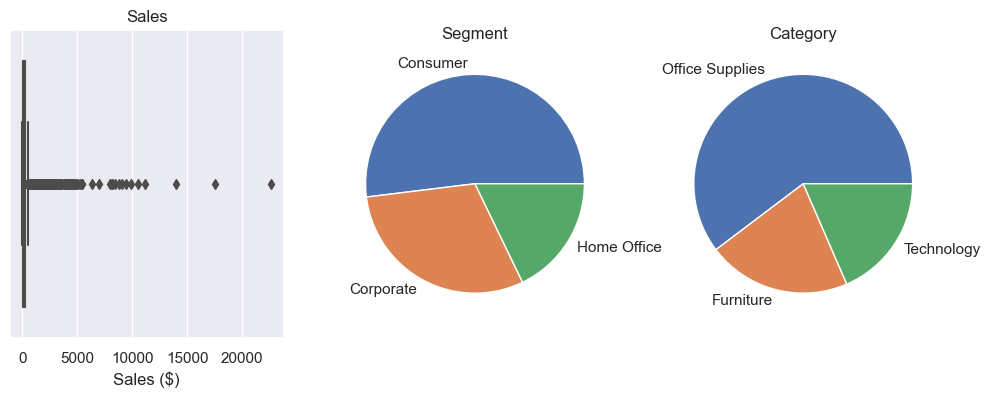

In [25]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_clean['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,3,2)
df_clean['Segment'].value_counts(normalize=True).plot(kind="pie")
plt.title('Segment')
plt.ylabel("")
plt.subplot(1,3,3)
df_clean['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.show();

In [36]:
# remove outliers
q1 = df_clean['Sales'].quantile(0.25)
q3 = df_clean['Sales'].quantile(0.75)
IQR = q3 - q1

filter = (df_clean['Sales'] >= q1 -1.5 *IQR) & (df_clean['Sales'] <= q3 + 1.5 *IQR)
df_cut = df_clean.loc[filter]
df_cut.shape

(8827, 10)

In [37]:
# remove outliers
q1 = df_cut['Profit'].quantile(0.25)
q3 = df_cut['Profit'].quantile(0.75)
IQR = q3 - q1

filter = (df_cut['Profit'] >= q1 -1.5 *IQR) & (df_cut['Profit'] <= q3 + 1.5 *IQR)
df_cut = df_cut.loc[filter]

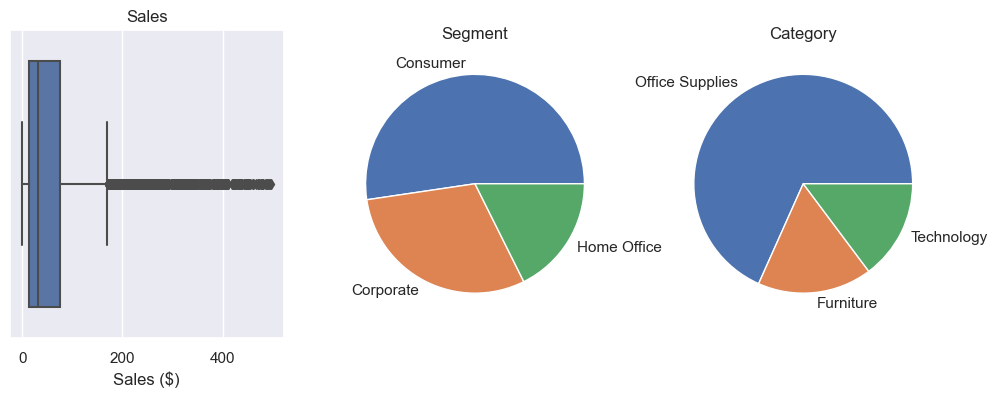

In [38]:
# plot the cleaned data
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_cut['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,3,2)
df_cut['Segment'].value_counts(normalize=True).plot(kind="pie")
plt.title('Segment')
plt.ylabel("")
plt.subplot(1,3,3)
df_cut['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.show();

In [39]:
# remove outliers - Profit
q1 = df_cut['Sales'].quantile(0.25)
q3 = df_cut['Sales'].quantile(0.75)
print(q1,q3)

12.96 75.85


#### Bivariate analysis
The analysis between a dependent variable and an independent variable to uncover the relationship between them.

In [40]:
State_sales_profit_mean = df_cut.groupby('State')['Sales', 'Profit'].mean()
State_sales_profit_mean.sort_values('Sales', ascending=False, inplace=True)

State_sales_profit_mean.head()

,Sales,Profit
State,,
Idaho,116.145647,14.620565
South Carolina,84.678750,16.437694
Oregon,76.357070,7.575691
California,74.152678,12.952794
Wisconsin,73.609718,16.545917


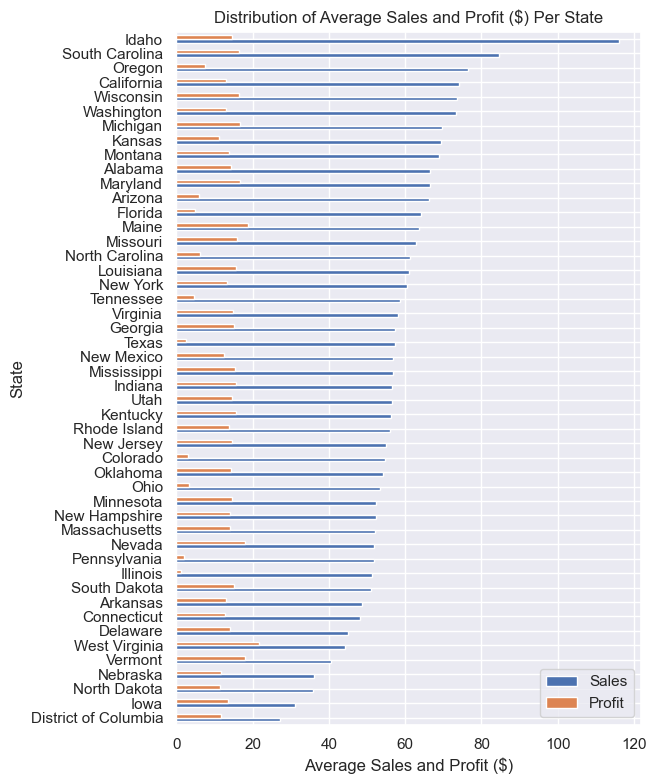

In [41]:
State_sales_profit_mean.reindex(index=State_sales_profit_mean.Sales.sort_values(ascending=True).index).plot(kind='barh', figsize=(6,9))
plt.xlabel('Average Sales and Profit ($)')
plt.title('Distribution of Average Sales and Profit ($) Per State')
plt.show();

In [42]:
sales_profit = pd.melt(df_cut[['State', 'Sales', 'Profit']], 
                        id_vars= 'State', 
                        var_name= 'Sales_profit',
                        value_vars =['Sales', 'Profit'], 
                        value_name= 'Amount')

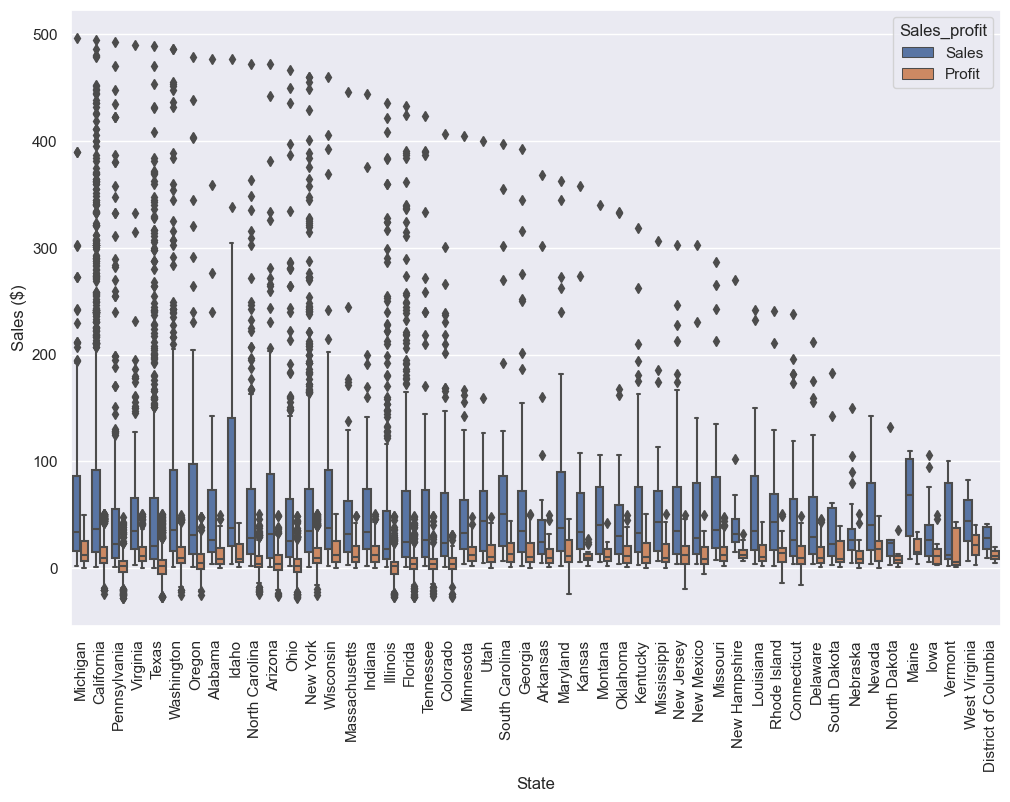

In [43]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='State', y='Amount',hue='Sales_profit', data=sales_profit)
plt.xticks(rotation='vertical')
plt.ylabel('Sales ($)')
plt.xlabel('State')
plt.show();

 - Looking at the distribution of States, we can see:
     - Idaho had the most average sales but had very few number of orders.
     - Customers in District of Columbia experienced the longest waiting time between order and shipping date.
     
- Question of interest:
     - What products had the customers in Idaho ordered most?
     - When had the worst delay happened in District of Columbia and what was the cause?
     
     
- Aside from some relatively high sales in Idaho, New Hampshire, and South Carolina, most sales appear to lie in a band from around 13 to over 76 dollars. Some States show more variability than others.

#### Multivariate analysis
When dealing with real-world data, many predictions we made are based on multivariate variables, because there can be multiple factors affecting the target variable over a period of time.

### Conclusions

EDA is an important step to take in the data analysis as it can uncover the important relationships between variables and guide the following data analysis and modeling process.